# **Downloading Data from Kaggle**


In [1]:
!pip install --upgrade --ignore-installed kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 6.7 MB/s 
     |████████████████████████████████| 155 kB 62.8 MB/s 
     |████████████████████████████████| 247 kB 70.4 MB/s 
     |████████████████████████████████| 62 kB 1.8 MB/s 
     |████████████████████████████████| 78 kB 8.8 MB/s 
     |████████████████████████████████| 140 kB 18.0 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 61 kB 126 kB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73052 sha256=deb74fee84f7eac88c56c017c016b5e1670f8fb9c252faacb70cf0ef3966f113
  Stored in directory: /root/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muizzahkhan","key":"54bf8e6e9112d814244c3948f03aae43"}'}

In [3]:
!mkdir ~/.kaggle #created at root folder in colab

In [4]:
!cp kaggle.json ~/.kaggle

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                             title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meirnizri/covid19-dataset                                       COVID-19 Dataset                                   5MB  2022-11-13 15:47:17          10747        314  1.0              
michals22/coffee-dataset                                        Coffee dataset                                    24KB  2022-12-15 20:02:12           1754         52  1.0              
thedevastator/jobs-dataset-from-glassdoor                       Salary Prediction                                  3MB  2022-11-16 13:52:31           6709        149  1.0              
thedevastator/unlock-profits-with-e-commerce-sales-data         E-Commerce 

In [7]:
!kaggle datasets download -d puneet6060/intel-image-classification

 99% 343M/346M [00:17<00:00, 25.8MB/s]
100% 346M/346M [00:17<00:00, 20.4MB/s]


In [8]:
!unzip -q intel-image-classification.zip

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
!cp "/content/intel-image-classification.zip" /content/drive/MyDrive/

#Importing Necessary libraries

In [11]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPooling2D, Flatten
import tensorflow as tf


In [15]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [24]:
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import h5py


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

#Data Preparation

In [14]:
train_path = "/content/seg_train/seg_train"
test_path = "/content/seg_test/seg_test"


In [20]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(train_path, target_size=(150,150), batch_size=128, class_mode = 'categorical')
testing_set = test_datagen.flow_from_directory(test_path, target_size=(150,150), batch_size=128, class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [19]:
np.array(img).shape


(150, 150, 3)

##Data Visualization

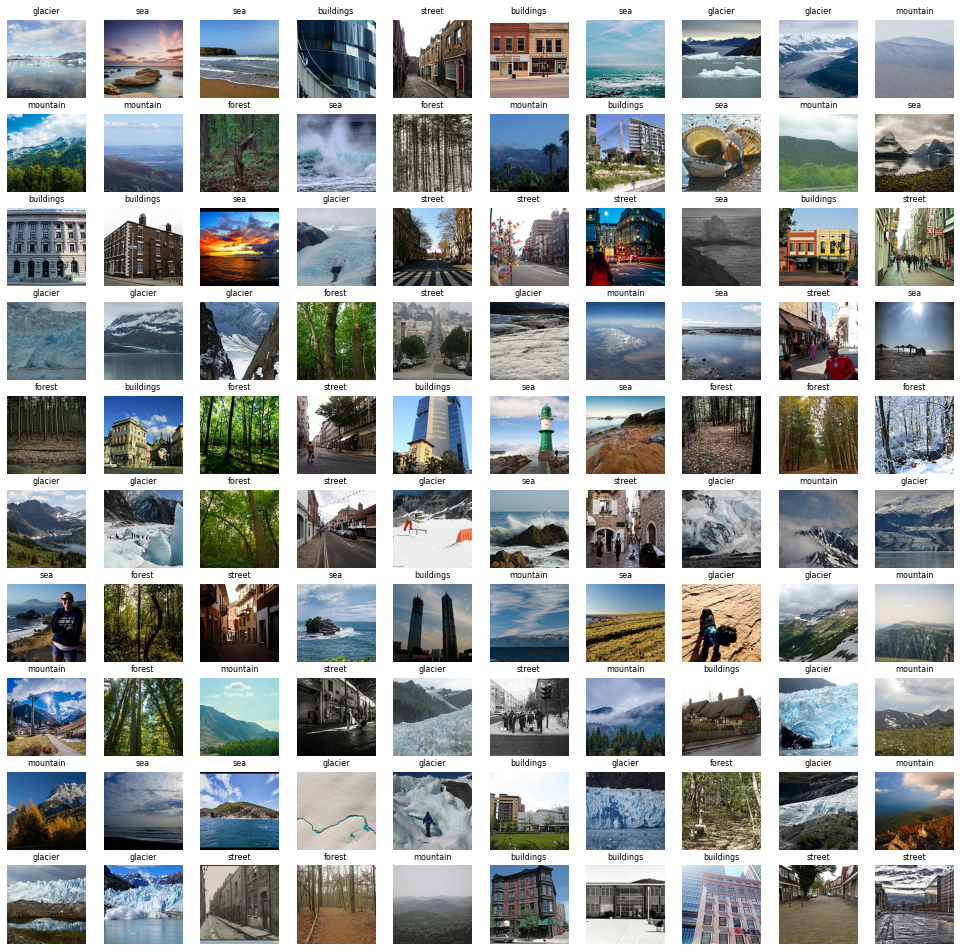

In [17]:
W = 10
H = 10
fig, axes = plt.subplots(W, H, figsize = (17,17))

axes = axes.ravel() # flaten the matrix into array
# Select a random number from 0 to n_training/ images will be selected randomly
for i in np.arange(0, W * H): 
    # Select a class randomly
    label = random.choice(os.listdir(train_path))
    class_dir = os.path.join(train_path,label)
    # Select a random image
    image = random.choice(os.listdir(class_dir))
    # read and display an image with the selected index    
    img = plt.imread(os.path.join(class_dir,image))
    axes[i].imshow( img )
    #print(np.array(img).shape)
    axes[i].set_title(label, fontsize = 8) # the label
    axes[i].axis('off')

#Model Building

In [21]:
alexnet = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150,150,3)),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.Conv2D(16, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #1st layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.Conv2D(32, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #2nd layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #3rd layer
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPool2D(2,2),  #4th layer
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(6, activation='softmax')                                                       
])


In [22]:
alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 conv2d_13 (Conv2D)          (None, 146, 146, 16)      2320      
                                                                 
 conv2d_14 (Conv2D)          (None, 144, 144, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 72, 72, 16)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 72, 72, 16)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 70, 70, 32)        4640      
                                                      

In [23]:
alexnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

In [25]:
# early stopping: we can use EarlyStopping which is one of keras callbackes to stop training when a monitored metric has stopped improving.
erl_stop = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
mod_chk = ModelCheckpoint(filepath='/kaggle/working/my_model.hdf5', monitor='val_loss', save_best_only=True)
lr_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1)

#Fitting The Model

In [26]:
hist = alexnet.fit(training_set, shuffle=True, epochs=20, validation_data=testing_set,
                           callbacks=[erl_stop, mod_chk, lr_rate], verbose=1)

Epoch 1/20
110/110 [==============================] - 102s 804ms/step - loss: 1.4324 - accuracy: 0.3436 - val_loss: 1.1596 - val_accuracy: 0.4687 - lr: 0.0010
Epoch 2/20
110/110 [==============================] - 88s 801ms/step - loss: 1.1276 - accuracy: 0.5069 - val_loss: 1.0029 - val_accuracy: 0.5827 - lr: 0.0010
Epoch 3/20
110/110 [==============================] - 82s 746ms/step - loss: 1.0368 - accuracy: 0.5626 - val_loss: 0.9268 - val_accuracy: 0.6063 - lr: 0.0010
Epoch 4/20
110/110 [==============================] - 81s 734ms/step - loss: 0.9250 - accuracy: 0.6202 - val_loss: 0.8802 - val_accuracy: 0.6427 - lr: 0.0010
Epoch 5/20
110/110 [==============================] - 81s 734ms/step - loss: 0.8741 - accuracy: 0.6487 - val_loss: 0.9360 - val_accuracy: 0.6273 - lr: 0.0010
Epoch 6/20
110/110 [==============================] - 82s 743ms/step - loss: 0.8284 - accuracy: 0.6816 - val_loss: 0.7387 - val_accuracy: 0.7163 - lr: 0.0010
Epoch 7/20
110/110 [==============================]

## Save the model

In [27]:

alexnet.save('Basic_CNN.h5')



##Load The Model

In [ ]:
# model = tf.keras.models.load_model('Basic_CNN.h5')

##Save weights

In [28]:
alexnet.save_weights('/content/alexnet_trained_wts.h5')

##Load The Weights

In [ ]:
# alexnet.load_weights('alexnet_trained_intelimg_1.h5')

##Evaluate the Model Loss And Accuracy

In [29]:
score = alexnet.evaluate(testing_set, steps=len(testing_set), verbose=1)
print('%.2f'%(score[1]*100))
print('Test Loss = ', score[0])
print('Test Accuracy = ', score[1])

24/24 [==============================] - 4s 150ms/step - loss: 0.4780 - accuracy: 0.8313
83.13
Test Loss =  0.4779600501060486
Test Accuracy =  0.831333339214325


#Plot The Loss and Accuracy for Training And Validation Data

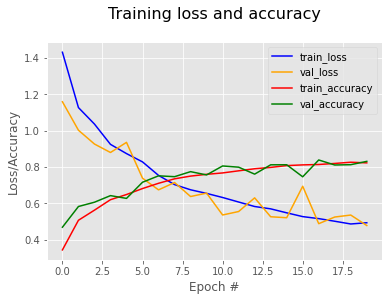

In [30]:
plt.style.use('ggplot')
plt.plot(hist.history['loss'], color='blue', label='train_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
plt.plot(hist.history['accuracy'], color='red', label='train_accuracy')
plt.plot(hist.history['val_accuracy'], color='green', label='val_accuracy')
plt.grid(True)
plt.title("Training loss and accuracy\n", fontsize=16)
plt.xlabel("Epoch #", fontsize=12)
plt.ylabel("Loss/Accuracy", fontsize=12)
plt.legend()
plt.show();

#Generate Confusion Metrics and Classification Report

24/24 [==============================] - 4s 155ms/step - loss: 0.4780 - accuracy: 0.8313
Confusion Matrix
[[ 63  74  88  87  68  57]
 [ 92  63  86  91  79  63]
 [ 93  83 116 105  88  68]
 [ 75  77 106 101  89  77]
 [ 68  74  93  97  99  79]
 [ 85  83  93  88  80  72]]
Classification Report
              precision    recall  f1-score   support

   buildings       0.13      0.14      0.14       437
      forest       0.14      0.13      0.14       474
     glacier       0.20      0.21      0.20       553
    mountain       0.18      0.19      0.18       525
         sea       0.20      0.19      0.20       510
      street       0.17      0.14      0.16       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



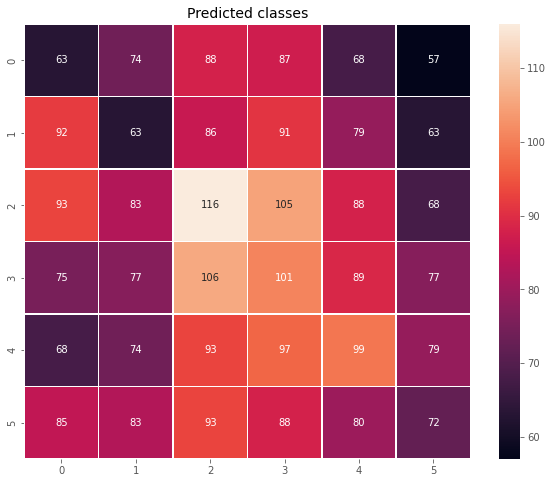

In [31]:
#Confusion Matrix and Classification Report
Y_pred = alexnet.predict(testing_set)
alexnet.evaluate(testing_set)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(testing_set.classes, y_pred))
print('Classification Report')
target_names = ['buildings','forest','glacier','mountain','sea','street']
print(classification_report(testing_set.classes, y_pred, target_names=target_names))
plt.figure(figsize=(10,8))
plt.title('Predicted classes', size=14)
#Plot Confusion Metrics
sns.heatmap(confusion_matrix(testing_set.classes, y_pred), annot=True, fmt = '.0f',linewidths=.5)
plt.show()